Time Series Forecasting Task:

Q1)

In [17]:
import yfinance as yf
import pandas as pd

# Fetch data for Apple Inc. from the past five years
data = yf.download('AAPL', start='2018-01-01', end='2023-01-01')
data = data['Close']  # We use only the closing prices
data = data.values.reshape(-1, 1)  # Reshape for later use in LSTM model

data = pd.DataFrame(data).fillna(method='ffill').values  # Fill missing values if any


[*********************100%%**********************]  1 of 1 completed


Q2)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

# Split into train and test sets
train_size = int(len(data) * 0.67)
test_size = len(data) - train_size
train, test = data[0:train_size,:], data[train_size:len(data),:]

# Convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 1
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(1, look_back)))
model.add(Dense(1))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Q3)

In [25]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, Y_train, epochs=100, batch_size=1, verbose=2)


Epoch 1/100
841/841 - 6s - 7ms/step - loss: 1.7847e-04
Epoch 2/100
841/841 - 4s - 5ms/step - loss: 1.7493e-04
Epoch 3/100
841/841 - 3s - 3ms/step - loss: 1.7801e-04
Epoch 4/100
841/841 - 3s - 3ms/step - loss: 1.7110e-04
Epoch 5/100
841/841 - 2s - 2ms/step - loss: 1.7066e-04
Epoch 6/100
841/841 - 3s - 3ms/step - loss: 1.7249e-04
Epoch 7/100
841/841 - 4s - 4ms/step - loss: 1.6329e-04
Epoch 8/100
841/841 - 3s - 3ms/step - loss: 1.8578e-04
Epoch 9/100
841/841 - 3s - 3ms/step - loss: 1.7104e-04
Epoch 10/100
841/841 - 2s - 2ms/step - loss: 1.7730e-04
Epoch 11/100
841/841 - 3s - 3ms/step - loss: 1.7429e-04
Epoch 12/100
841/841 - 2s - 2ms/step - loss: 1.7164e-04
Epoch 13/100
841/841 - 2s - 2ms/step - loss: 1.8041e-04
Epoch 14/100
841/841 - 3s - 3ms/step - loss: 1.7840e-04
Epoch 15/100
841/841 - 2s - 2ms/step - loss: 1.6862e-04
Epoch 16/100
841/841 - 4s - 4ms/step - loss: 1.6912e-04
Epoch 17/100
841/841 - 2s - 2ms/step - loss: 1.7182e-04
Epoch 18/100
841/841 - 2s - 2ms/step - loss: 1.6805e-04
E

Q4)

In [26]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invert predictions
train_predict = scaler.inverse_transform(train_predict)
Y_train_inv = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test_inv = scaler.inverse_transform([Y_test])

# Calculate root mean squared error and mean absolute error
train_score_rmse = np.sqrt(mean_squared_error(Y_train_inv[0], train_predict[:,0]))
test_score_rmse = np.sqrt(mean_squared_error(Y_test_inv[0], test_predict[:,0]))
train_score_mae = mean_absolute_error(Y_train_inv[0], train_predict[:,0])
test_score_mae = mean_absolute_error(Y_test_inv[0], test_predict[:,0])

print(f'Train RMSE: {train_score_rmse:.2f}, Test RMSE: {test_score_rmse:.2f}')
print(f'Train MAE: {train_score_mae:.2f}, Test MAE: {test_score_mae:.2f}')


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Train RMSE: 1.74, Test RMSE: 3.78
Train MAE: 1.12, Test MAE: 2.96


Image Classification Task:

Epoch 1/10
422/422 - 28s - 66ms/step - accuracy: 0.9338 - loss: 0.2324 - val_accuracy: 0.9793 - val_loss: 0.0786 - learning_rate: 0.0010
Epoch 2/10
422/422 - 41s - 97ms/step - accuracy: 0.9792 - loss: 0.0715 - val_accuracy: 0.9850 - val_loss: 0.0578 - learning_rate: 0.0010
Epoch 3/10
422/422 - 41s - 97ms/step - accuracy: 0.9859 - loss: 0.0477 - val_accuracy: 0.9868 - val_loss: 0.0529 - learning_rate: 0.0010
Epoch 4/10
422/422 - 41s - 98ms/step - accuracy: 0.9889 - loss: 0.0363 - val_accuracy: 0.9857 - val_loss: 0.0564 - learning_rate: 0.0010
Epoch 5/10
422/422 - 40s - 95ms/step - accuracy: 0.9919 - loss: 0.0267 - val_accuracy: 0.9853 - val_loss: 0.0521 - learning_rate: 0.0010
Epoch 6/10
422/422 - 27s - 64ms/step - accuracy: 0.9933 - loss: 0.0212 - val_accuracy: 0.9872 - val_loss: 0.0479 - learning_rate: 0.0010
Epoch 7/10
422/422 - 40s - 95ms/step - accuracy: 0.9952 - loss: 0.0160 - val_accuracy: 0.9870 - val_loss: 0.0502 - learning_rate: 0.0010
Epoch 8/10
422/422 - 42s - 100ms/step - a

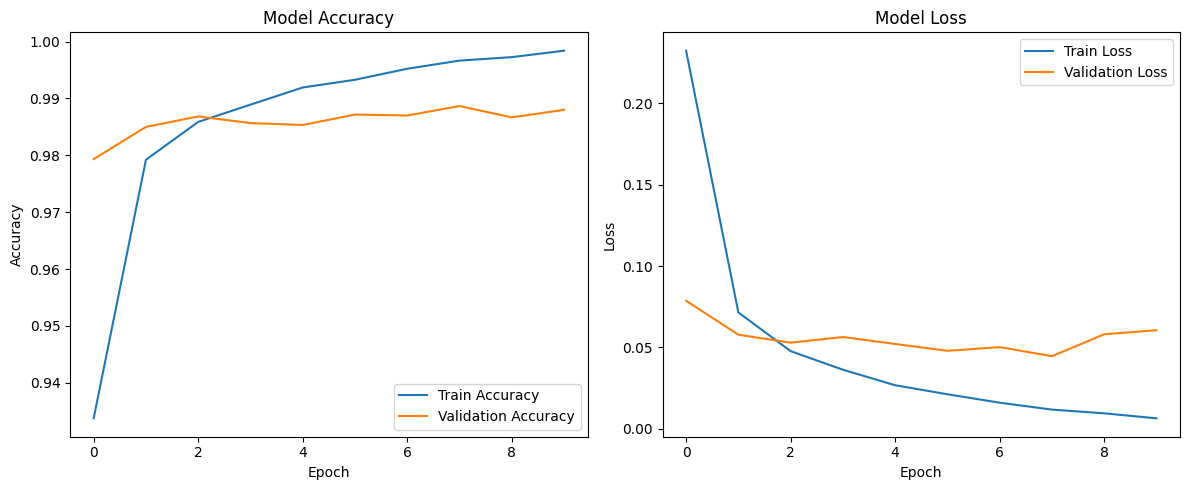

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape the data to include a channel dimension and normalize
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32') / 255

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001, verbose=1)

# Train the model with the callback
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.1,
    callbacks=[reduce_lr],
    verbose=2
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_accuracy*100:.2f}%")

# Plot the training history
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()
